# Iris Type Clustering Problem using *KMeans*



> Here we use the KMeans Clustering to cluster and classify Iris types given sepal length and sepal width. This has been trained on the built-in Iris dataset.We have also used PCA (Principal Component Analysis) to reduce dimensionality of the data.



Iris Type : 3; Flower Samples : 150; Flower Features : 4


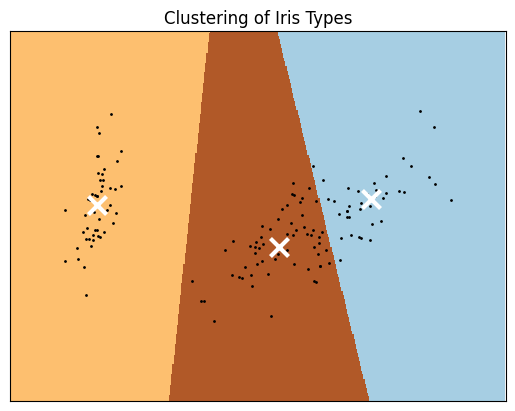

In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets , metrics
from sklearn.model_selection import train_test_split

data,labels = datasets.load_iris(return_X_y=True)
(n_samples,n_features),n_classes = data.shape , np.unique(labels).size
print(f"Iris Type : {n_classes}; Flower Samples : {n_samples}; Flower Features : {n_features}")

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++",n_clusters=n_classes,n_init=4)
kmeans.fit(reduced_data)

h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "Clustering of Iris Types"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()